In [ ]:
#Withnolines enhances the image

In [ ]:
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
from PIL import ImageEnhance
from spellchecker import SpellChecker
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [222]:
image_input = "uploads/input.jpg" #best.jpg;check.jpg;qwerty.jpg;text.jpg
img_save = "uploads/filtered.jpg"

In [223]:
from PIL import Image, ImageEnhance 
im = Image.open(image_input)
enhancer = ImageEnhance.Color(im)
enhanced_im = enhancer.enhance(0.0)

enhancer = ImageEnhance.Sharpness(enhanced_im)
enhanced_im = enhancer.enhance(2.0)

enhancer = ImageEnhance.Contrast(enhanced_im)
enhanced_im = enhancer.enhance(0.5)

enhancer = ImageEnhance.Brightness(enhanced_im)
enhanced_im = enhancer.enhance(1.5)

enhancer = ImageEnhance.Contrast(enhanced_im)
enhanced_im = enhancer.enhance(2.0)

enhanced_im.save(img_save)

In [224]:
img = cv2.imread(img_save, -1)

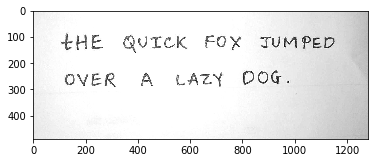

In [225]:
plt.imshow(img)

In [226]:
img = cv2.GaussianBlur(img,(5,5),0)

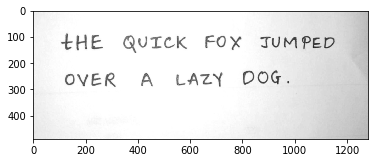

In [227]:
plt.imshow(img)

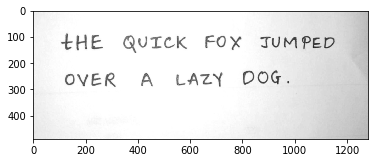

In [228]:
size_tup = img.shape
b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b])
my_mask= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = img
plt.imshow(img2)

In [229]:
print (size_tup)

(489, 1280, 3)


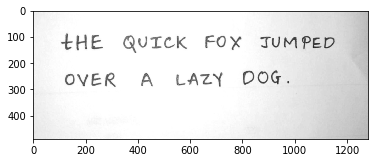

In [230]:
plt.imshow(img)

In [231]:
print(pytesseract.image_to_string(img3))

tHE Quick FOX JUMPED
OVER A LAZY DOG.


In [232]:
strout = pytesseract.image_to_string(img3)

In [233]:
print(strout)

tHE Quick FOX JUMPED
OVER A LAZY DOG.


In [234]:
#Proper nouns have to be written in Capitals.

spell = SpellChecker()
i = 0
list2 = (strout.split())
pnounmark = [0] * (len (list2))
#mark all the proper nouns with 1
for word in list2:
    if(word[0] <= 'Z' and word[0] >= 'A'):
        pnounmark[i] = 1
    i = i + 1
        
list1 = strout.split()
i = 0
#If the word is not a proper noun and the spelling is not correct then replace
for word in list1:
    if((pnounmark[i] != 1) and (spell[word] == 0)):
        if (list1[i][len(list1[i]) - 1] == '.'):
            list1[i] = spell.correction(word)
            list1[i] = list1[i] + '.'
            i = i + 1
            continue
        if (list1[i][len(list1[i]) - 1] == ','):
            list1[i] = spell.correction(word)
            list1[i] = list1[i] + ','
            i = i + 1
            continue
        list1[i] = spell.correction(word)
    i = i + 1
strcorr = ' '.join(map(str, list1))
print(strcorr)

tHE Quick FOX JUMPED OVER A LAZY DOG.


In [235]:
file = open('ans/ans.txt','w') 
file.write(strcorr)  
file.close()